In [1]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
tv_projects = utils.get_server_projects()
animals = utils.get_animals_in_project("visual_and_COT_data")
animals_to_remove = ['test', 'test2', 'punish_test']
animals = [animal for animal in animals if animal not in animals_to_remove]
# retrieve the data for the remaining animals
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path("visual_and_COT_data") / Path("sessions") / Path(mouse)
    # create the directory if it doesn't exist
    local_path.mkdir(parents=True, exist_ok=True)
    # download the session data
    utils.rsync_cluster_data(
        project_name="visual_and_COT_data",
        file_path="sessions/{}/{}.csv".format(mouse, mouse),
        local_path=str(local_path),
        credentials=utils.get_idibaps_cluster_credentials(),
    )

df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path("visual_and_COT_data") / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

receiving incremental file list

sent 27 bytes  received 77 bytes  41.60 bytes/sec
total size is 553,938,026  speedup is 5,326,327.17
receiving incremental file list

sent 27 bytes  received 78 bytes  70.00 bytes/sec
total size is 495,635,722  speedup is 4,720,340.21
receiving incremental file list

sent 27 bytes  received 78 bytes  70.00 bytes/sec
total size is 535,186,755  speedup is 5,097,016.71
receiving incremental file list

sent 27 bytes  received 78 bytes  30.00 bytes/sec
total size is 453,793,098  speedup is 4,321,839.03
receiving incremental file list

sent 27 bytes  received 78 bytes  19.09 bytes/sec
total size is 425,198,507  speedup is 4,049,509.59
receiving incremental file list

sent 27 bytes  received 77 bytes  18.91 bytes/sec
total size is 511,593,330  speedup is 4,919,166.63
receiving incremental file list

sent 27 bytes  received 78 bytes  19.09 bytes/sec
total size is 501,171,573  speedup is 4,773,062.60
receiving incremental file list

sent 27 bytes  received 77 by

/tmp/ipykernel_24087/1090325015.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.


/tmp/ipykernel_24087/1090325015.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV002.


/tmp/ipykernel_24087/1090325015.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.


/tmp/ipykernel_24087/1090325015.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV004.


/tmp/ipykernel_24087/1090325015.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV005.


/tmp/ipykernel_24087/1090325015.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_24087/1090325015.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_24087/1090325015.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_24087/1090325015.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.


/tmp/ipykernel_24087/1090325015.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV010.


In [3]:
time_of_restraint_removal_start = '2025-06-10 14:00:00'
time_of_restraint_removal_end = '2025-08-28 08:00:00'
time_before_removal = pd.to_datetime(time_of_restraint_removal_start) - pd.Timedelta(days=45)

# transform the date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')


In [4]:
# remove the dates when mirrors were introduced
df = df[np.logical_or(df['date'] < pd.to_datetime('2025-07-21 08:00:00'),
                      df['date'] > pd.to_datetime('2025-07-25 20:00:00'))]
# remove time when sound stopped working
df = df[np.logical_or(df['date'] < pd.to_datetime('2025-07-02 08:00:00'),
                      df['date'] > pd.to_datetime('2025-07-07 20:00:00'))]
# TV stopped
df = df[np.logical_or(df['date'] < pd.to_datetime('2025-08-01 15:00:00'),
                      df['date'] > pd.to_datetime('2025-08-03 15:00:00'))]
# started culling animals
df = df[df['date'] < pd.to_datetime('2025-09-29 08:00:00')]
# remove the 2025-06-10, 21 and 23 date, and 07/07 nad 08
dates_to_remove = [pd.to_datetime('2025-06-10').date(),
    pd.to_datetime('2025-06-21').date(),
    pd.to_datetime('2025-06-23').date(),
    pd.to_datetime('2025-07-07').date(),
    pd.to_datetime('2025-08-08').date()]
df = df[~df['date'].dt.date.isin(dates_to_remove)]

In [5]:

df_before = df[np.logical_or(np.logical_and(df['date'] > time_before_removal, 
                                            df['date'] < pd.to_datetime(time_of_restraint_removal_start)),
                              df['date'] > pd.to_datetime(time_of_restraint_removal_end))]
df_after = df[np.logical_and(df['date'] >= pd.to_datetime(time_of_restraint_removal_start), 
                        df['date'] < pd.to_datetime(time_of_restraint_removal_end))]

In [6]:
occupancy_df_before = dft.get_start_and_end_of_sessions_df(df_before)
daily_percentages_before = dft.get_daily_occupancy_percentages(occupancy_df_before)

occupancy_df_after = dft.get_start_and_end_of_sessions_df(df_after)
daily_percentages_after = dft.get_daily_occupancy_percentages(occupancy_df_after)

In [7]:
# merge the two dataframes
# '25/30mins_4hours'
# '1min_1min'
occupancy_df_before['time_limit'] = 'ON'
occupancy_df_after['time_limit'] = 'OFF'
# turn daily percentages into a dataframe with the index as a column
daily_percentages_before = daily_percentages_before.reset_index()
daily_percentages_after = daily_percentages_after.reset_index()
daily_percentages_before['time_limit'] = 'ON'
daily_percentages_after['time_limit'] = 'OFF'
occupancy_df = pd.concat([occupancy_df_before, occupancy_df_after], ignore_index=True)
daily_percentages = pd.concat([daily_percentages_before, daily_percentages_after], ignore_index=False)

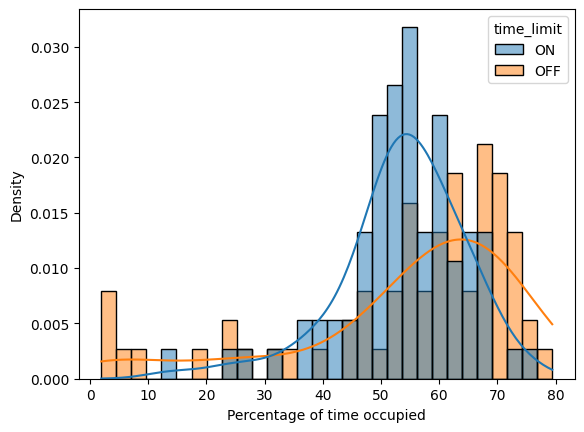

In [8]:
sns.histplot(data=daily_percentages, x='duration', hue='time_limit', stat='density', bins=30, kde=True)
plt.xlabel("Percentage of time occupied")
plt.show()

In [9]:
# night and day occupancy
occupancy_heatmap_before = dft.get_occupancy_heatmap(occupancy_df[occupancy_df.time_limit == 'ON'], window_size=60)
occupancy_heatmap_after = dft.get_occupancy_heatmap(occupancy_df[occupancy_df.time_limit == 'OFF'], window_size=60)

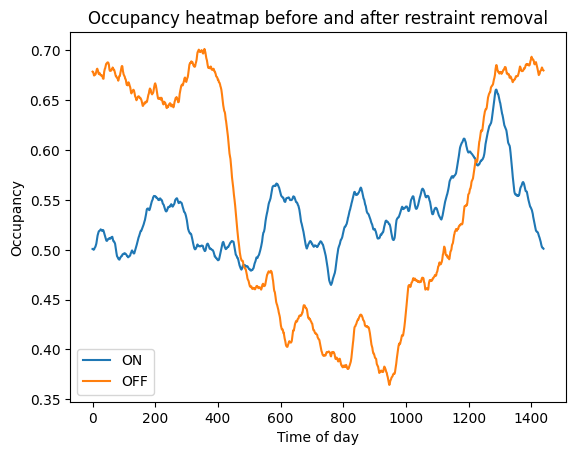

In [10]:
min_of_day = list(np.arange(0, len(occupancy_heatmap_before)))
plt.plot(min_of_day, occupancy_heatmap_before, label='ON')
plt.plot(min_of_day, occupancy_heatmap_after, label='OFF')
plt.xlabel("Time of day")
plt.ylabel("Occupancy")
plt.title("Occupancy heatmap before and after restraint removal")
plt.legend()
plt.show()

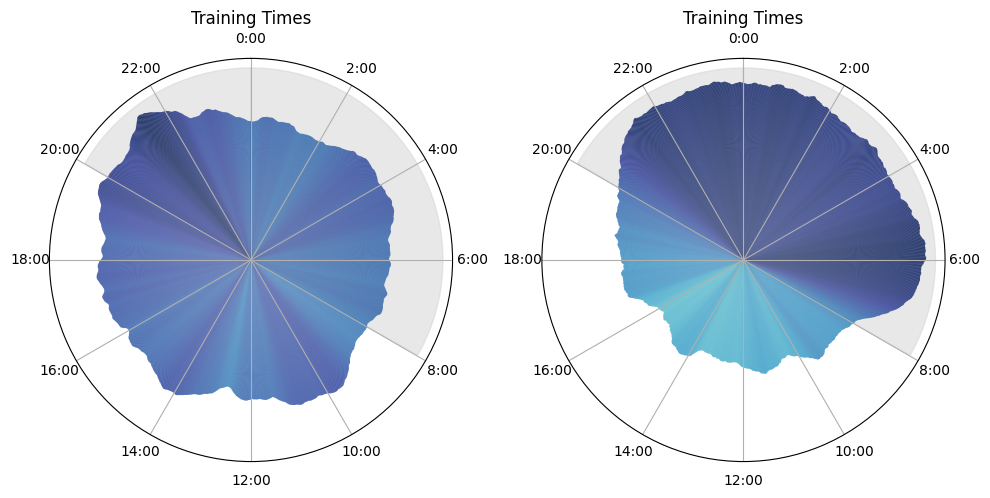

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={"projection": "polar"})
plots.plot_training_times_clock_heatmap(occupancy_heatmap_before, ax=axs[0])
plots.plot_training_times_clock_heatmap(occupancy_heatmap_after, ax=axs[1])
plt.tight_layout()
plt.show()

In [12]:
occ_df_gb = occupancy_df.groupby(['subject', 'date', 'time_limit'])['duration'].sum().reset_index()
occ_df_gb['percentage_of_day'] = occ_df_gb['duration'] / 1440 * 100  # convert to percentage of day


In [13]:
occ_df_gini = occ_df_gb.groupby(['time_limit', 'subject'])['duration'].mean().reset_index()

In [14]:
# Gini coef
def get_gini(occ_sbjc):
    n = len(occ_sbjc)
    cum_subjects = np.arange(1, n + 1) / n
    cum_occupancy = np.cumsum(occ_sbjc) / occ_sbjc.sum()
    cum_occupancy = np.insert(cum_occupancy, 0, 0)
    cum_subjects = np.insert(cum_subjects, 0, 0)
    gini = 1 - 2 * np.trapz(cum_occupancy, cum_subjects)
    return gini

gini_dict = {}
for tl in occ_df_gini['time_limit'].unique():
    occ_sbjc = np.sort(occ_df_gini[occ_df_gini['time_limit'] == tl]['duration'].values)
    gini = get_gini(occ_sbjc)
    gini_dict[tl] = gini
    print(f"Gini coefficient for {tl}: {gini:.5f}")


Gini coefficient for OFF: 0.06756
Gini coefficient for ON: 0.02813


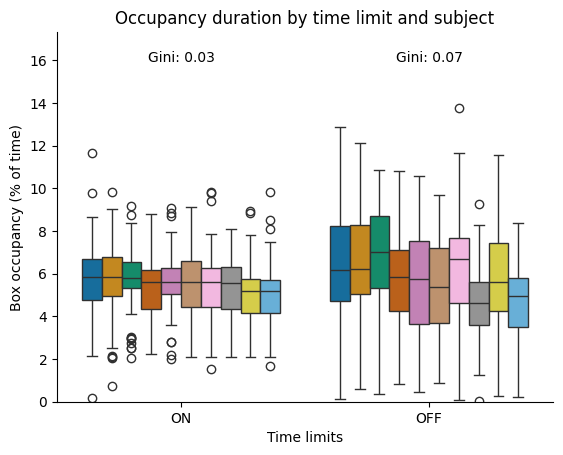

In [15]:
sort_order = occ_df_gb[occ_df_gb.time_limit=="ON"].groupby('subject')['duration'].median().sort_values(ascending=False).index
# specify a palette for the subjects that is good for categorical data
palette = sns.color_palette("colorblind", len(sort_order))
# save the order and palette in a dictionary with subject names as keys
sort_palette = {subject: palette[i] for i, subject in enumerate(sort_order)}
sns.boxplot(data=occ_df_gb, x='time_limit', y='percentage_of_day', hue='subject', hue_order=sort_order, palette=palette)
# plt.xticks(rotation=45)
plt.title('Occupancy duration by time limit and subject')
# move legend to the right outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel('Box occupancy (% of time)')
plt.xlabel('Time limits')
# plt.show()
# despine
sns.despine()
# increase a bit the y axis limits on the top
plt.ylim(0, plt.ylim()[1] * 1.2)
# write the gini coefficients on the plot
for i, tl in enumerate(occ_df_gb['time_limit'].unique()):
    gini = gini_dict[tl]
    plt.text(i, plt.ylim()[1] * 0.95, f"Gini: {gini:.2f}", ha='center', va='top', fontsize=10)
# remove legend
plt.legend().remove()
# save figure as .pdf
plt.savefig('figures/hmv_no_restraints_occupancy_duration_by_subject.pdf', bbox_inches='tight', transparent=True)

<Axes: xlabel='time_limit', ylabel='duration'>

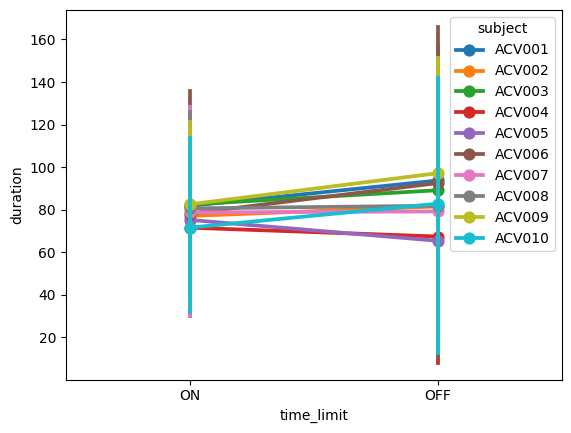

In [16]:
# compare each mouse before and after
sns.pointplot(data=occ_df_gb, x='time_limit', y='duration', hue='subject', native_scale=True, linestyles="-", errorbar=("pi", 95))

In [17]:
# check how the occupancy between mice correlates. This can be complex and is hard
# to interpret, as sometimes the box is stopped, so the correlation might be positive

In [26]:
## plot a distribution with the histogram of number of trials in total and by mouse

# get session summary data
local_path = Path(utils.get_outpath()) / Path(tv_projects[3])
# download the session data
utils.rsync_cluster_data(
    project_name=tv_projects[3],
    file_path="sessions_summary.csv",
    local_path=str(local_path),
    credentials=utils.get_idibaps_cluster_credentials(),
)
sessions_summary_df = pd.read_csv(local_path / Path('sessions_summary.csv'), sep=';')

receiving incremental file list

sent 27 bytes  received 83 bytes  73.33 bytes/sec
total size is 12,036,737  speedup is 109,424.88


In [27]:
sessions_summary_df['date'] = pd.to_datetime(sessions_summary_df['date'], format='%Y-%m-%d %H:%M:%S')
sessions_summary_df['year_month_day'] = sessions_summary_df['date'].dt.date
sessions_summary_df = sessions_summary_df[sessions_summary_df['year_month_day'].isin(occ_df_gb.date.unique())]
# copy the time_limit column from occ_df_gb to sessions_summary_df
sessions_summary_df = pd.merge(sessions_summary_df, occ_df_gb[['subject', 'date', 'time_limit']], left_on=['subject', 'year_month_day'], right_on=['subject', 'date'], how='left')
sessions_summary_df.drop(columns=['date_y'], inplace=True)
sessions_summary_df.rename(columns={'date_x': 'date'}, inplace=True)
sessions_summary_df.dropna(subset=['time_limit'], inplace=True)

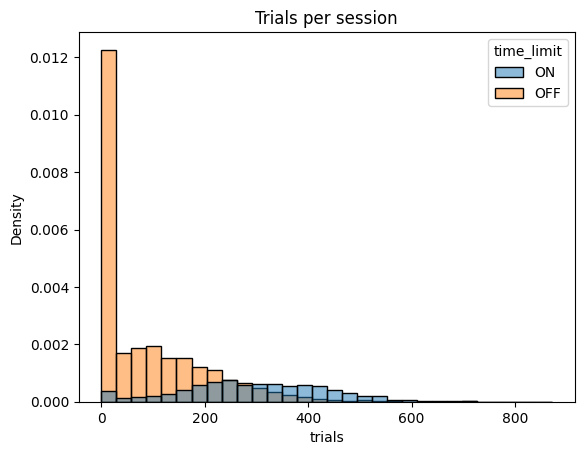

In [28]:
sns.histplot(data=sessions_summary_df, x='trials', hue='time_limit', stat='density', bins=30)
plt.title("Trials per session")
# plt.show()
# save figure as .pdf
plt.savefig('figures/hmv_no_restraints_trials_per_session_including_exploratory.pdf', bbox_inches='tight', transparent=True)

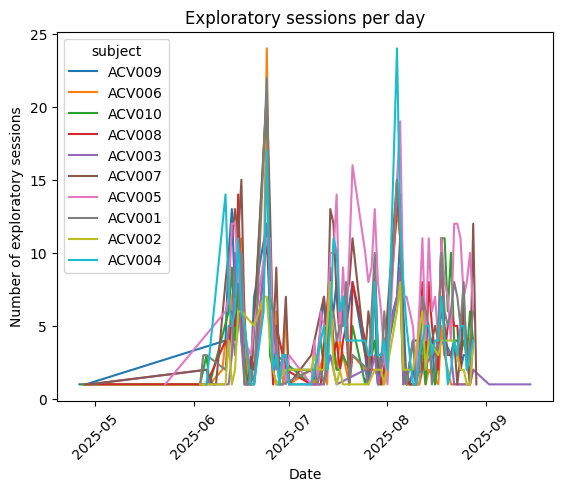

In [29]:
# get a number of exploratory entries (sessions with less than 10 trials)
# calculate the number of trials per day, and the number of sessions per day
exploratory_sessions = sessions_summary_df[sessions_summary_df['trials'] < 5]
# group them by date and subject and count them
exploratory_sessions = exploratory_sessions.groupby(['year_month_day', 'subject']).size().reset_index(name='count')
# plot them over time
sns.lineplot(data=exploratory_sessions, x='year_month_day', y='count', hue='subject')
plt.title("Exploratory sessions per day")
plt.xlabel("Date")
plt.ylabel("Number of exploratory sessions")
plt.xticks(rotation=45)

plt.show()

In [30]:
# remove them from the dataset
sessions_summary_df = sessions_summary_df[sessions_summary_df['trials'] >= 5]

In [31]:
trials_per_day = sessions_summary_df.groupby(['year_month_day', 'time_limit', 'subject']).agg({'trials': 'sum', 'task': 'count'}).reset_index()
# rename the columns
trials_per_day.rename(columns={'task': 'sessions'}, inplace=True)

In [ ]:
# cap the number of sessions to 10 for plotting
# trials_per_day['sessions'] = trials_per_day['sessions'].clip(upper=10)

/tmp/ipykernel_24087/2204005665.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend().remove()
/tmp/ipykernel_24087/2204005665.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[2].legend().remove()


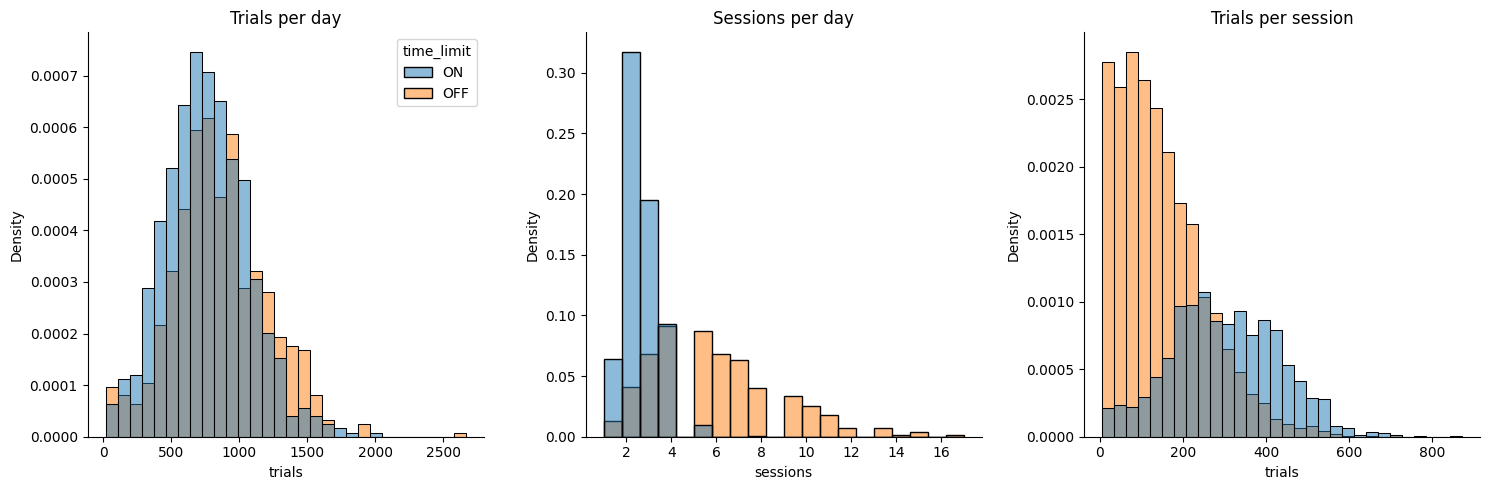

In [32]:
# plot three histograms, one for trials and one for sessions, and one for trials per session
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=trials_per_day, x='trials', hue='time_limit', stat='density', bins=30, ax=ax[0])
sns.histplot(data=trials_per_day, x='sessions', hue='time_limit', stat='density', bins=20, ax=ax[1])
sns.histplot(data=sessions_summary_df, x='trials', hue='time_limit', stat='density', bins=30, ax=ax[2])
ax[0].set_title("Trials per day")
ax[1].set_title("Sessions per day")
ax[2].set_title("Trials per session")
for a in ax:
    sns.despine(ax=a)

# remove legend from the second and third plot
ax[1].legend().remove()
ax[2].legend().remove()
plt.tight_layout()
# plt.show()
# save figure as .pdf
plt.savefig('figures/hmv_no_restraints_trials_and_sessions_per_day_without_exploratory_sessions.pdf', bbox_inches='tight', transparent=True)

In [33]:
# write csvs
trials_per_day.to_csv('figures/time_restraints_trials_per_day.csv', index=False)
sessions_summary_df.to_csv('figures/time_restraints_sessions_summary.csv', index=False)

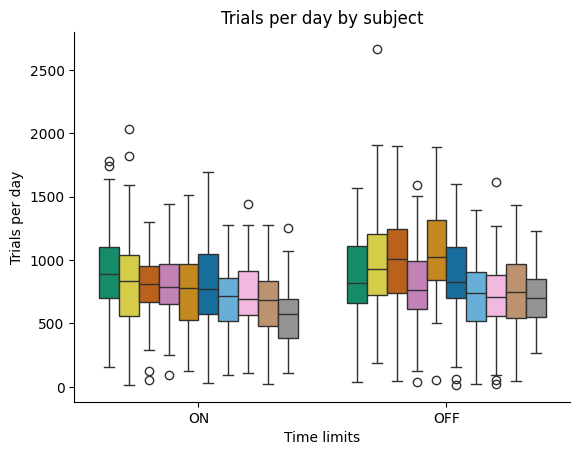

In [34]:
# make boxplots for each mouse as above
hue_order = sorted(trials_per_day['subject'].unique())
# trials_per_day['subject'] = pd.Categorical(trials_per_day['subject'], categories=hue_order, ordered=True)
# fig, ax = plt.subplots(1, 2, figsize=(15, 5))
new_sort_order = trials_per_day[trials_per_day.time_limit=='ON'].groupby('subject')['trials'].median().sort_values(ascending=False).index
new_palette = [sort_palette[subject] for subject in new_sort_order]
sns.boxplot(data=trials_per_day, x='time_limit', y='trials', hue='subject', hue_order=new_sort_order, palette=new_palette)
# sns.boxplot(data=trials_per_day, x='time_limit', y='sessions', ax=ax[1], hue='subject', hue_order=new_sort_order)
# ax[0].set_title('Trials per day by time limit and subject')
# ax[1].set_title('Sessions per day by time limit and subject')
# ax[0].get_legend().remove()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
sns.despine()
plt.legend().remove()
plt.ylabel('Trials per day')
plt.xlabel('Time limits')
plt.title('Trials per day by subject')
# plt.show()
# save figure as .pdf
plt.savefig('figures/hmv_no_restraints_trials_and_sessions_per_day_by_subject.pdf', bbox_inches='tight', transparent=True)

In [ ]:
# plot performance by mouse over trials with vertical lines for the time of restraint removal
training_stage_to_look_at = "TwoAFC_auditory_easy"
df_tla = df[df['current_training_stage'] == training_stage_to_look_at]
df_tla = dft.analyze_df(df_tla)

/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/df_transforms.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna("not saved")
/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/df_transforms.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["correct"] = df["correct"].infer_objects(copy=False)


In [ ]:
df_tla["time_limit"] = np.where(
    df_tla['date'] < pd.to_datetime(time_of_restraint_removal),
    '25/30mins_4hours',
    '1min_1min'
)

In [ ]:
df_to_plot_correct = df_tla.groupby(['subject', 'year_month_day', 'time_limit'])[['correct']].mean().reset_index()

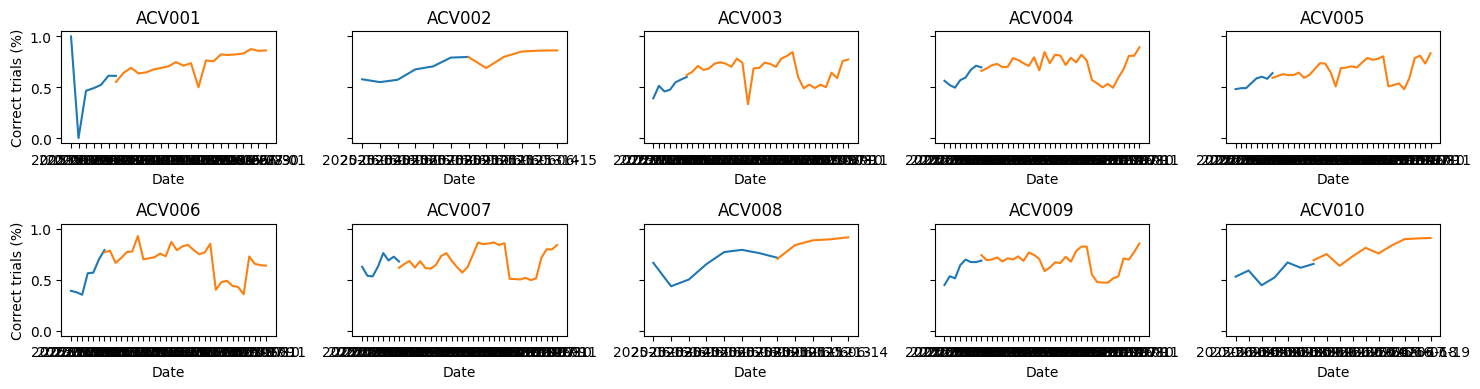

In [ ]:
ncols = df_to_plot_correct.subject.nunique() / 2
nrows = 2
fig, axes = plt.subplots(nrows, int(np.ceil(ncols)), figsize=(15, 2 * nrows), sharey=True)
for i, (subject, group) in enumerate(df_to_plot_correct.groupby('subject')):
    ax = axes[i // int(np.ceil(ncols)), i % int(np.ceil(ncols))]
    sns.lineplot(data=group, x='year_month_day', y='correct', hue='time_limit', ax=ax)
    ax.set_title(f"{subject}")
    # ax.axvline(pd.to_datetime(time_of_restraint_removal), color='red', linestyle='--', label='Time of restraint removal')
    # ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Correct trials (%)")
    ax.legend().remove()
plt.tight_layout()
plt.show()

In [ ]:
# redo it by computing the performance in each trial.
df_subject_list = []
for mouse in animals:
    df_mouse = df_tla[df_tla['subject'] == mouse]
    # calculate the performances
    df_mouse = dft.get_performance_through_trials(df_mouse, window=100)
    df_subject_list.append(df_mouse)

df2afc = pd.concat(df_subject_list, ignore_index=True)

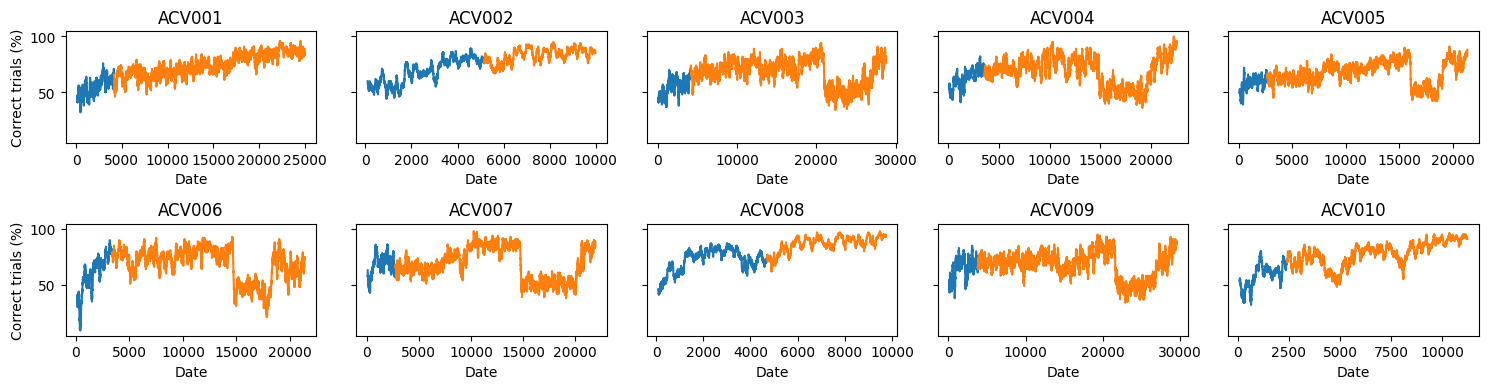

In [ ]:
fig, axes = plt.subplots(nrows, int(np.ceil(ncols)), figsize=(15, 2 * nrows), sharey=True)
for i, (subject, group) in enumerate(df2afc.groupby('subject')):
    ax = axes[i // int(np.ceil(ncols)), i % int(np.ceil(ncols))]
    sns.lineplot(data=group, x='total_trial', y='performance_w', hue='time_limit', ax=ax)
    ax.set_title(f"{subject}")
    # ax.axvline(pd.to_datetime(time_of_restraint_removal), color='red', linestyle='--', label='Time of restraint removal')
    # ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Correct trials (%)")
    ax.legend().remove()
plt.tight_layout()
plt.show()

In [ ]:
## Differences between night and day sessions